# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [13]:
import palmerpenguins
from palmerpenguins import *
import pandas as pd
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
penguin = load_penguins()
penguin = pd.get_dummies(penguin,columns = ["sex","island","species"])
penguin = penguin.dropna()
penguin.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,2007,False,True,False,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,True,True,False,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,True,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,True,True,False,False
5,39.3,20.6,190.0,3650.0,2007,False,True,False,False,True,True,False,False


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [30]:

y = penguin["bill_depth_mm"]

# 4 different models
models = {
    "Model 1": penguin[["flipper_length_mm"]],
    "Model 2": penguin[["flipper_length_mm", "body_mass_g"]],
    "Model 3": penguin[["flipper_length_mm", "body_mass_g", "sex_female"]],
    "Model 4": penguin[["flipper_length_mm", "body_mass_g", "sex_female", "bill_length_mm"]]
}

# List to store results
results = []

for model_name, X in models.items():
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Fit the linear regression model
    model = LinearRegression().fit(X_train, y_train)

    # Predict
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # MSE
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    # Put MSE values in the list
    results.append({
        "Model": model_name,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
    })

results_df = pd.DataFrame(results)

results_df


,Model,Train MSE,Test MSE
0,Model 1,2.541628,2.633901
1,Model 2,2.531456,2.587977
2,Model 3,1.374068,1.731491
3,Model 4,1.347478,1.712658


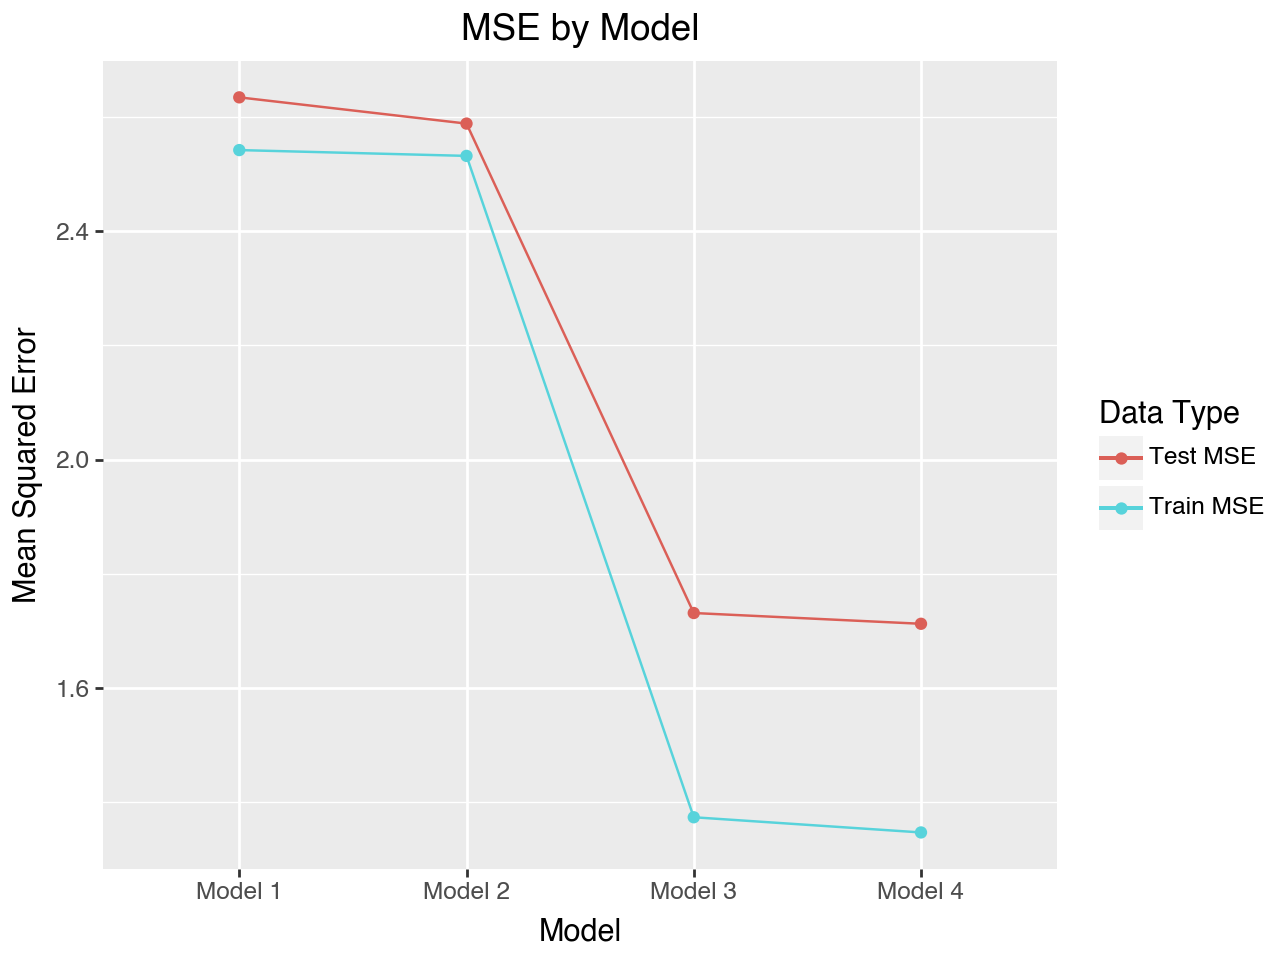

In [41]:
import plotnine as pl

# long format to plot
melted_results = results_df.melt(id_vars="Model", 
                                  value_vars=["Train MSE", "Test MSE"],
                                  var_name="Data Type", 
                                  value_name="MSE")

(
    pl.ggplot(melted_results, pl.aes(x='Model', y='MSE', color='Data Type', group='Data Type')) +
    pl.geom_line() +  
    pl.geom_point() + 
    pl.labs(title='MSE by Model',
             x='Model',
             y='Mean Squared Error') 
)

From this plot we can see that model 4 was best which makes sense because it  has the most predictor variables.